# Exploratory Data Analysis

### Load in the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df = pd.read_csv('../data/data.csv') # read in the csv with byte_array - label pairs

In [3]:
print("Number of packets: {}".format(len(df)))
df.head()

Number of packets: 0


,label,byte1,byte2,byte3,byte4,byte5,byte6,byte7,byte8,byte9,...,byte1471,byte1472,byte1473,byte1474,byte1475,byte1476,byte1477,byte1478,byte1479,byte1480


### Number of packets per label:

Text(0.5, 0, 'Number of packets')

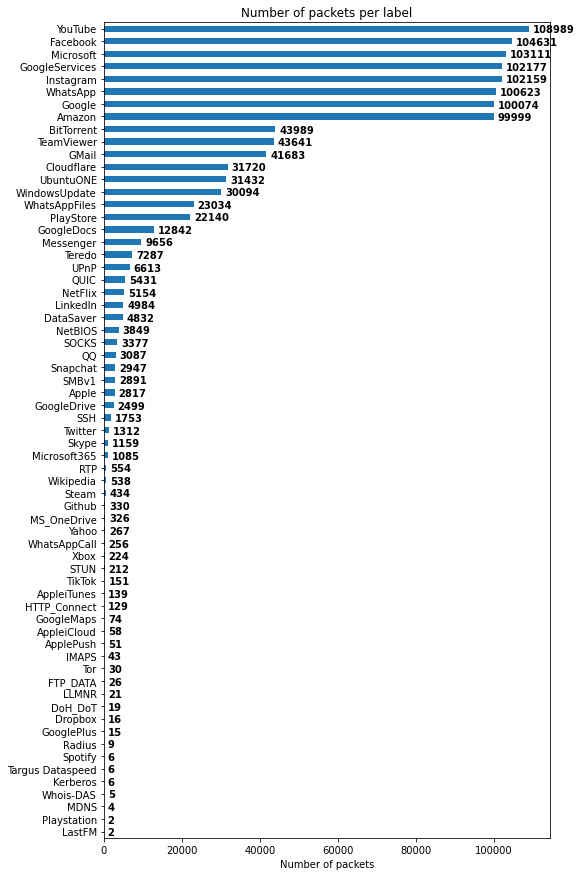

In [5]:
plt.figure(figsize=(8,15))
df_label_counts = df["label"].value_counts().sort_values(ascending=True)
ax = df_label_counts.plot.barh()
for i, v in enumerate(df_label_counts):
    ax.text(v+1000, i-0.3, str(v), fontweight='bold')
plt.title("Number of packets per label")
plt.xlabel("Number of packets")

### Histogram of packet lengths:

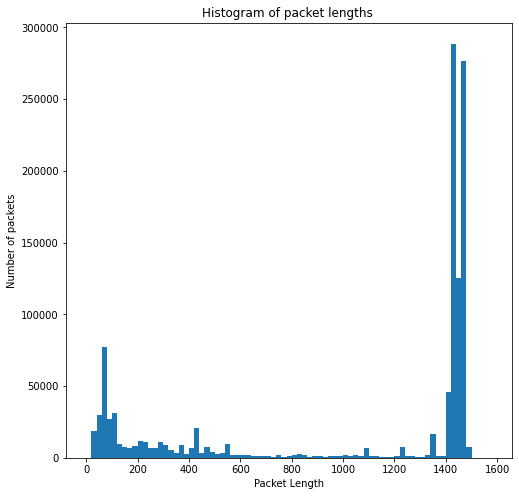

In [8]:
df["packet_length"] = 1480-df.isna().sum(axis=1)
plt.figure(figsize=(8,8))
df["packet_length"].plot.hist(bins = list(range(0, 1600, 20)))
plt.xlabel("Packet Length")
plt.ylabel("Number of packets")
plt.title("Histogram of packet lengths ");

### Median packet lengths by class

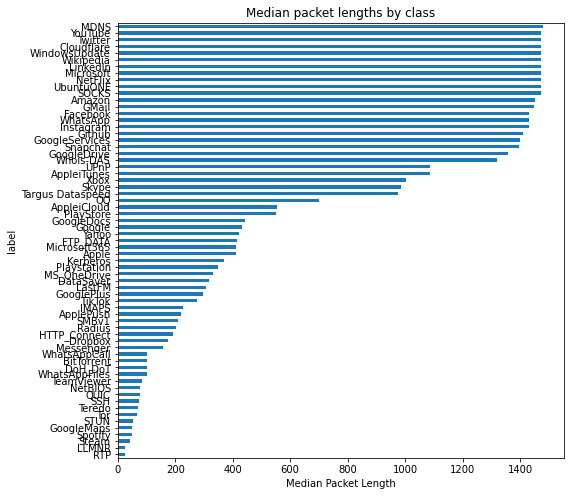

In [7]:
df["packet_length"] = 1480-df.isna().sum(axis=1)
df.groupby('label')["packet_length"].median().sort_values().plot.barh(figsize=(8,8))
plt.xlabel("Median Packet Length")
plt.title("Median packet lengths by class");

### Distribution plots of packet lengths per class

Text(0.5, 1.0, 'Distribution plots of packet lengths per class')

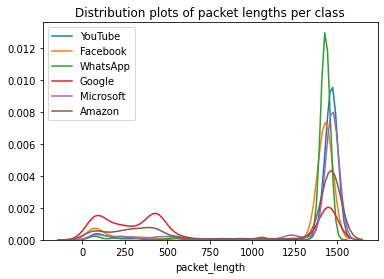

In [9]:
sns.distplot(df[df["label"] == "YouTube"]["packet_length"], hist=False, label="YouTube")
sns.distplot(df[df["label"] == "Facebook"]["packet_length"], hist=False, label="Facebook")
sns.distplot(df[df["label"] == "WhatsApp"]["packet_length"], hist=False, label="WhatsApp")
sns.distplot(df[df["label"] == "Google"]["packet_length"], hist=False, label="Google")
sns.distplot(df[df["label"] == "Microsoft"]["packet_length"], hist=False, label="Microsoft")
sns.distplot(df[df["label"] == "Amazon"]["packet_length"], hist=False, label="Amazon")
plt.legend()
plt.title("Distribution plots of packet lengths per class")